<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Analysis-of-RSS-Feed-Content-with-Topic-Identification" data-toc-modified-id="Analysis-of-RSS-Feed-Content-with-Topic-Identification-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Analysis of RSS-Feed Content with Topic Identification</a></span><ul class="toc-item"><li><span><a href="#Data-Collection" data-toc-modified-id="Data-Collection-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data Collection</a></span></li><li><span><a href="#Overview-of-Feed-Data" data-toc-modified-id="Overview-of-Feed-Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Overview of Feed Data</a></span><ul class="toc-item"><li><span><a href="#Article-Sizes" data-toc-modified-id="Article-Sizes-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Article Sizes</a></span></li><li><span><a href="#Overview-of-Article-Authors" data-toc-modified-id="Overview-of-Article-Authors-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Overview of Article Authors</a></span></li><li><span><a href="#Tags-Specified-by-the-Feed-Publishers" data-toc-modified-id="Tags-Specified-by-the-Feed-Publishers-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Tags Specified by the Feed Publishers</a></span></li></ul></li><li><span><a href="#Identifying-Topics-within-the-Articles" data-toc-modified-id="Identifying-Topics-within-the-Articles-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Identifying Topics within the Articles</a></span></li><li><span><a href="#Using-Soft-Cosine-Similarity-to-Cluster-Stories" data-toc-modified-id="Using-Soft-Cosine-Similarity-to-Cluster-Stories-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Using Soft Cosine Similarity to Cluster Stories</a></span><ul class="toc-item"><li><span><a href="#LDA-Analysis-with-the-pyLDAvis-Visualization" data-toc-modified-id="LDA-Analysis-with-the-pyLDAvis-Visualization-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>LDA Analysis with the pyLDAvis Visualization</a></span></li></ul></li></ul></li></ul></div>

# Analysis of RSS-Feed Content with Topic Identification

## Data Collection

Data is collected from a wide range of RSS-Feeds..

In [1]:
%load_ext autoreload
%autoreload
import importlib
%aimport reader
#importlib.import_module("reader")
importlib.reload(reader)

from reader import loadAllFeedsFromFile, summarizeItems,getFeedDict,collectArticles,summarizeByDate

A large number of names and URLs of  compatible feeds are pre-defined in the convenience function getFeedDict. The user may however supply her own dictzionary of feeds for subsequent processing

In [2]:
allFeeds=getFeedDict()
print(allFeeds)  # TODO Display nicely in a pandas table

{'NY Times': 'https://www.nytimes.com/svc/collections/v1/publish/https://www.nytimes.com/section/world/rss.xml', 'Buzzfeed': 'https://www.buzzfeed.com/world.xml', 'Al Jazeera': 'http://www.aljazeera.com/xml/rss/all.xml', 'Defence Blog': 'http://defence-blog.com/feed', 'Global Issues': 'http://www.globalissues.org/news/feed', 'The Cifer Brief': 'https://www.thecipherbrief.com/feed', 'Yahoo': 'https://www.yahoo.com/news/world/rss', 'Times of India': 'https://timesofindia.indiatimes.com/rssfeeds/296589292.cms', 'The Guardian': 'https://www.theguardian.com/world/rss', 'CNBC': 'https://www.cnbc.com/id/100727362/device/rss/rss.html', 'RT': 'https://www.rt.com/rss/news/', 'Reuters': 'http://feeds.reuters.com/Reuters/worldNews', 'Der Spiegel': 'https://www.spiegel.de/international/index.rss', 'Vox': 'https://www.vox.com/rss/world/index.xml', 'Time Magazine': 'https://time.com/feed', 'UN': 'https://news.un.org/feed/subscribe/en/news/all/rss.xml', 'BBC News': 'http://feeds.bbci.co.uk/news/rss.xm

In [3]:
feedDict={'NY Times': 'https://www.nytimes.com/svc/collections/v1/publish/https://www.nytimes.com/section/world/rss.xml', 'Buzzfeed': 'https://www.buzzfeed.com/world.xml', 'Al Jazeera': 'http://www.aljazeera.com/xml/rss/all.xml', 'Defence Blog': 'http://defence-blog.com/feed', 'Global Issues': 'http://www.globalissues.org/news/feed'}
#collectArticles(allFeeds) 
collectArticles(feedDict) # TODO remopve after testing

NY Times
Buzzfeed
Al Jazeera
Defence Blog
Global Issues



'rssreader/data/feed22052020_185121.pickle'

In [4]:
allDict=loadAllFeedsFromFile()

loading file:  rssreader/data\feed16052020_010028.pickle
loading file:  rssreader/data\feed16052020_124115.pickle
loading file:  rssreader/data\feed20052020_221210.pickle
loading file:  rssreader/data\feed22052020_135635.pickle
loading file:  rssreader/data\feed22052020_173323.pickle
loading file:  rssreader/data\feed22052020_185121.pickle


## Overview of Feed Data

In [5]:
summarizeItems(allDict)

### Article Sizes

Let's take a look at the sizes of the articles over time and from the various feeds

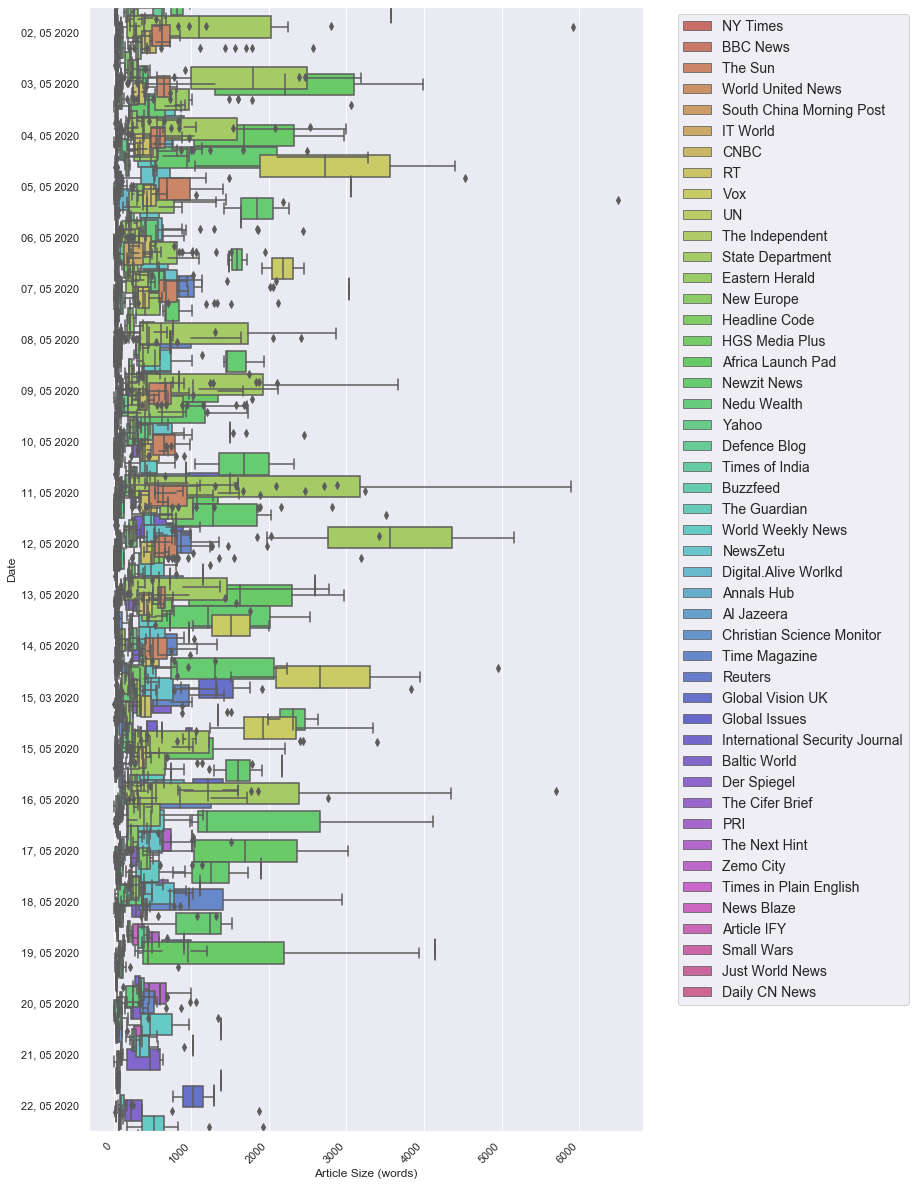

In [6]:
importlib.reload(reader)
summarizeByDate(allDict)

### Overview of Article Authors

In [7]:
#importlib.import_module("samples.seabornScatterPlots") # TODO move to base directory, not samples
%aimport samples.seabornScatterPlots 
from samples.seabornScatterPlots import displayTopics,displayAuthors,displayTags

With author: 5312 Without author: 3613


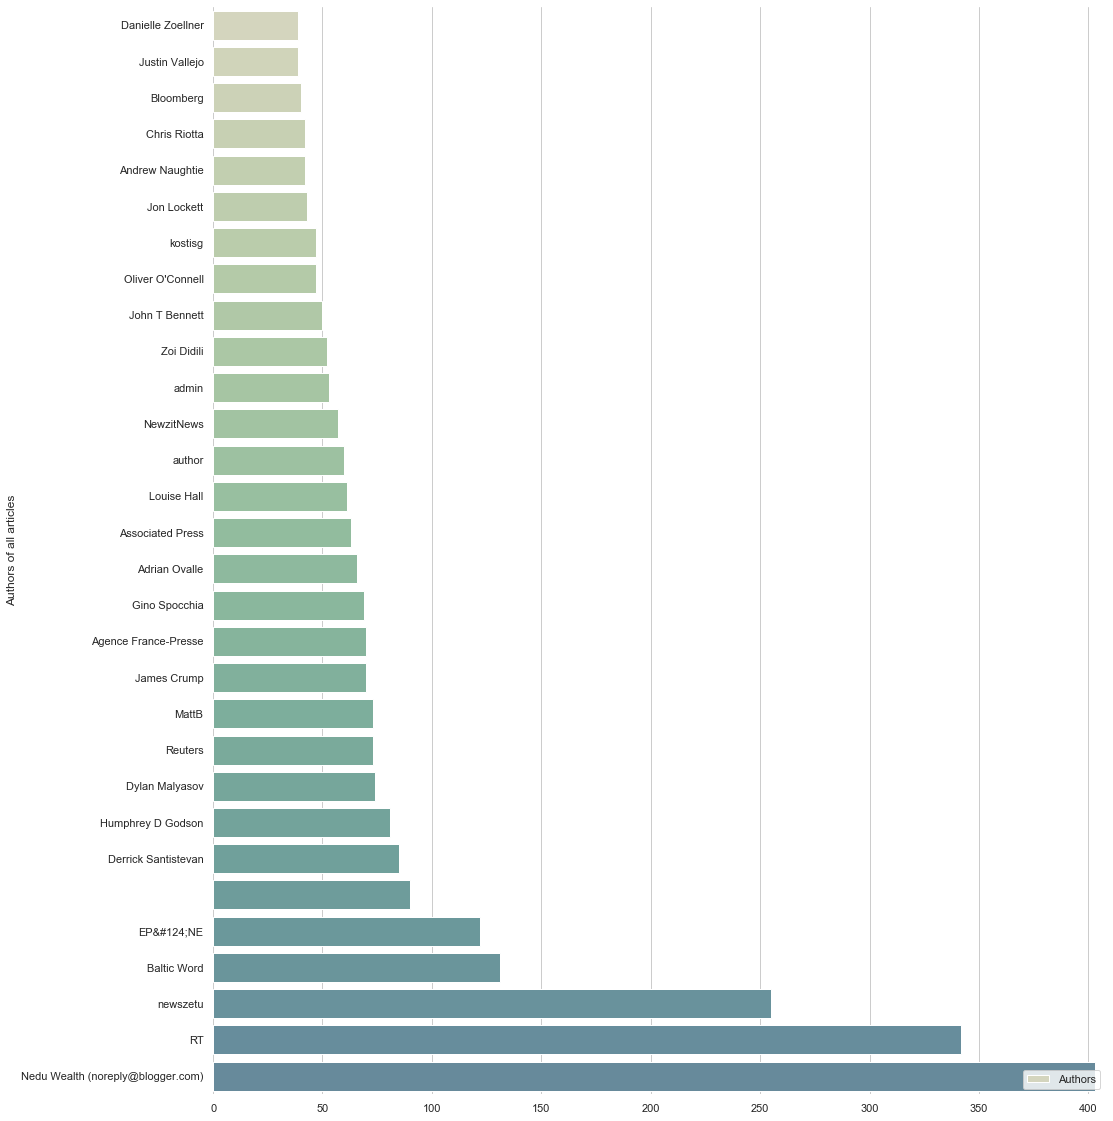

In [8]:
displayAuthors(dict=allDict)

### Tags Specified by the Feed Publishers

There were 3626 items with tags and 5299 without tags
These are the 10 most frequent tags used:
 [('News', 761), ('worldNews', 483), ('Coronavirus', 349), ('World News', 325), ('World', 307), ('Coronavirus outbreak', 290), ('World news', 269), ('Uncategorized', 247), ('National News', 185), ('COVID-19', 175), ('Sports', 148), ('US news', 142), ('Business', 138), ('Europe', 135), ('wire', 133), ('Covid-19 Pandemic', 132), ('USA', 131), ('UK news', 131), ('News Desk', 127), ('China', 125)]


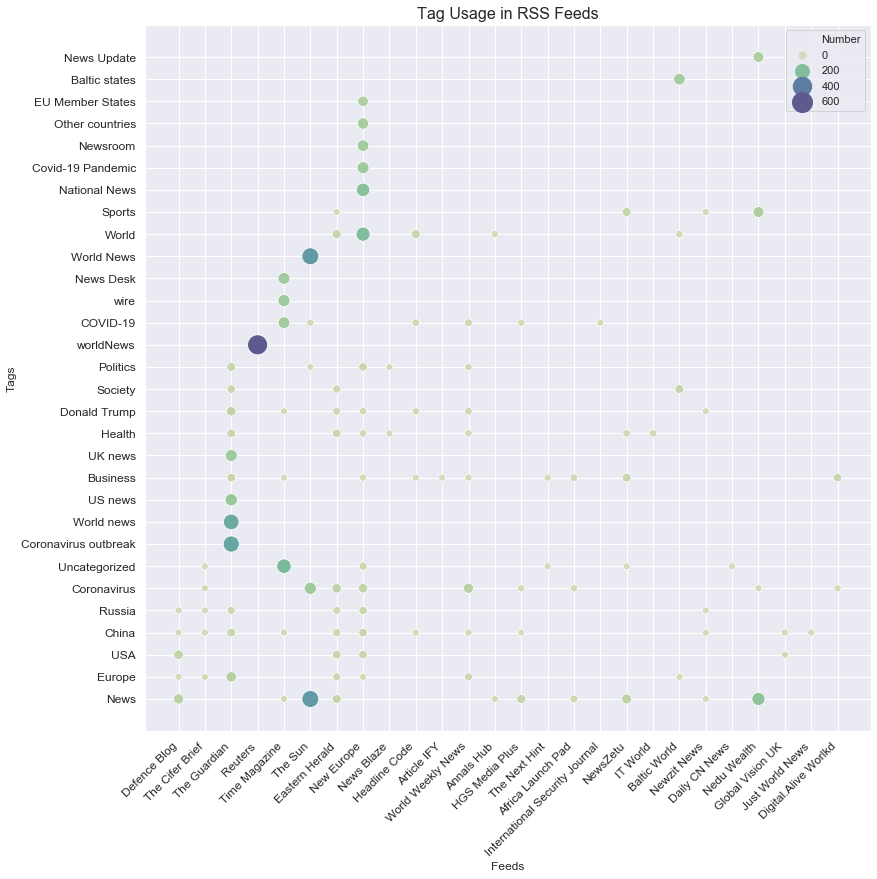

In [9]:
#import matplotlib.pyplot as plt
#plt.figure(figsize=(8,10))
#allDict=loadAllFeedsFromFile()
%aimport samples.seabornScatterPlots
importlib.reload(samples.seabornScatterPlots)
displayTags(allDict)

## Identifying Topics within the Articles

In [10]:
#importlib.import_module("topicmap")
%aimport topicmap
importlib.reload(topicmap)
from topicmap import displayTopicsAndFeeds,getDocList, getAllTopics,getCustomStopWords, deriveTopicMaps, updateDictionaryByFuzzyRelevanceofTopics
from topicmap import doStandardInitialize,getAllFeedTopics

In [11]:
docContentList=getDocList(allDict, reloaddocs=False,stop_list=getCustomStopWords())
topics= deriveTopicMaps(docContentList, maxNum=40, ngram_range=(3,3))

Function updateDictionaryByFuzzyRelevanceofTopics:

Add list of topics to each entry of the given allEntryDict for each topic that has a fuzzy relevance of greater than the specified threshold, which can be changed here, as required

removal of 200522135430191 not possible
removal of 200522135430191 not possible
removal of 200522135430191 not possible
removal of 200522135430191 not possible

There were 1671 items with topics and 0 without topics
These are the 20 most frequent topics used:
 [('latest updatessee coronavirus', 1235), ('new coronavirus cases', 644), ('ourcoronavirus latest news', 157), ('read ourcoronavirus latest', 152), ('world health organisation', 147), ('world health organization', 143), ('president donald trump', 136), ('first onisj international', 121), ('social distancing measures', 104), ('social distancing rules', 83), ('state department official', 74), ('us president donald', 68), ('international security journal', 63), ('onisj international security', 52), ('senior state department', 50), ('president xi jinping', 41), ('covid 19 outbreak', 35), ('first onworld weekly', 34), ('onworld weekly news', 30), ('covid 19 pandemic', 30)]


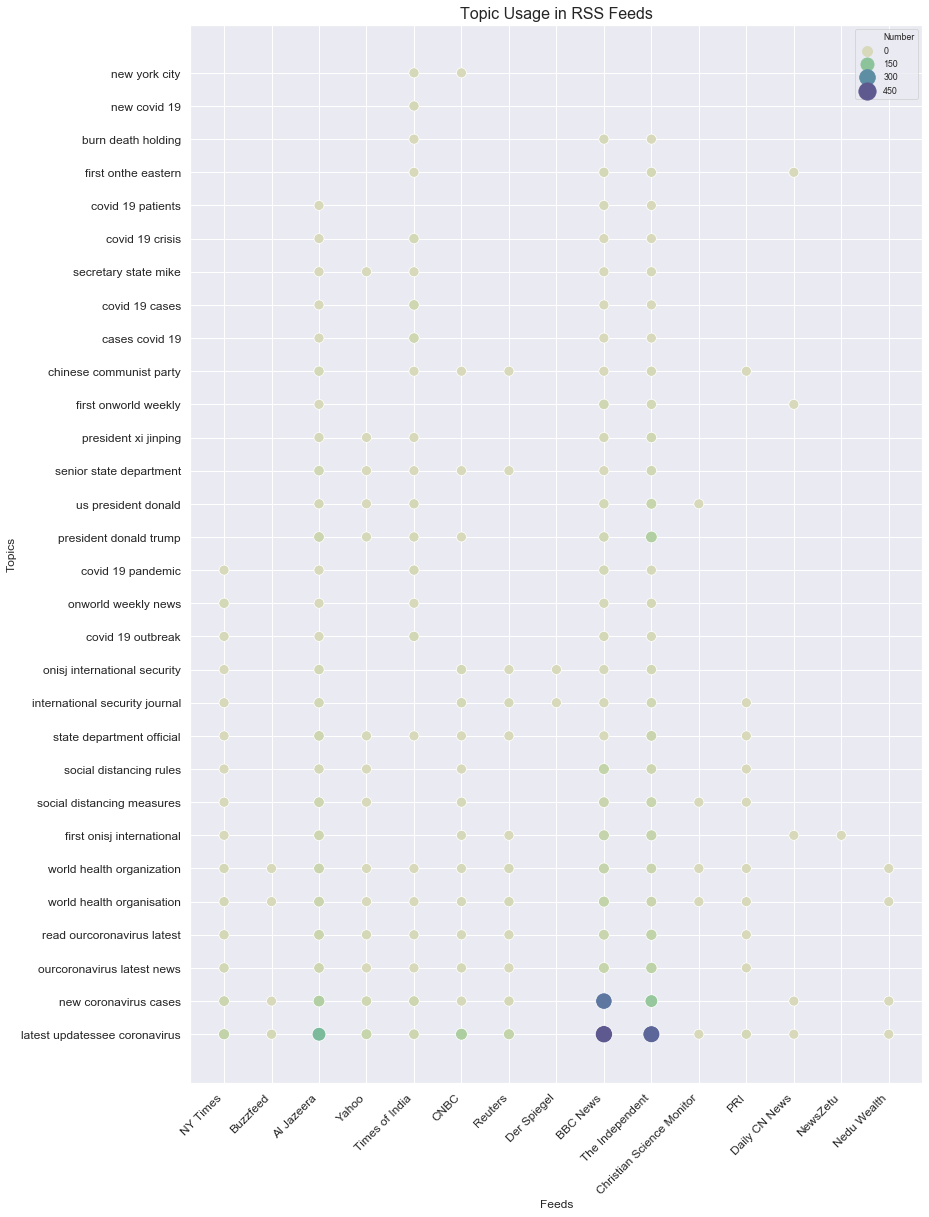

In [12]:
updateDictionaryByFuzzyRelevanceofTopics(topics,allDict, limit=None, threshold=60, remove=True)
displayTopicsAndFeeds(allDict)

Mausi explains the scatterplot ..... TODO

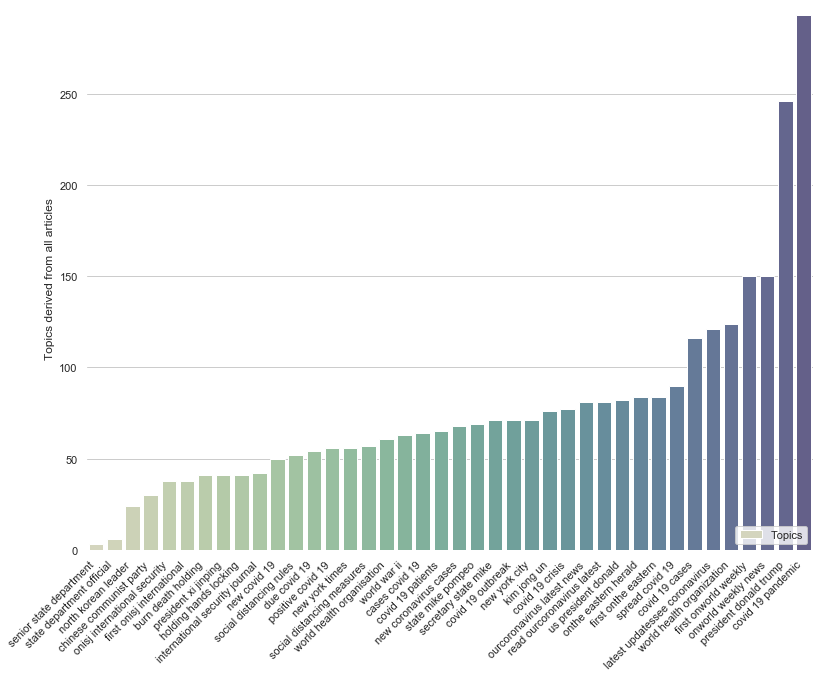

In [13]:
displayTopics(topics)

Clearly the overwhelmingly most prevalent topic (in May 2020) is the coronavirus pandemic (Covid-19). Not only as the main story of the day (and of the month and year), but also spurning dozenzs of other sub-stories emanating from the Covid-19 crisis. Etc ....

## Using Soft Cosine Similarity to Cluster Stories

TODO: reformulate the following
Get docs from file, get list of titles+content, calculate (40) topics using 3,4 ngrams map topics Add list of topics to each entry of the given allEntryDict for each topic that has an LDA fuzzy relevance (see fuzzywuzzy process) of greater than the specified threshold. Calculate SoftCosine-Similarity matrix with WordEmbeddings fasttext_model300 (dimension 300) or GloVe (dimension 50) save matrix to file do spectral analysis and dimension reduction (PCA method) on similarity matrix  plotScatter3D with tool tips.
The sizes of the spheres in the plot are scaled to the degree of cosine similarity for the article in relation to the cluster.

In [79]:
%aimport Gensim.gensim_test
importlib.reload(Gensim.gensim_test)
from Gensim.gensim_test import deriveSoftCosineSimilarityMatrix,test3DPlotOfCosineSimilarity ,showPyLDAvis, saveDFPickle

In [34]:
matrix=deriveSoftCosineSimilarityMatrix(allDict)
saveDFPickle(matrix) # TODO remove or make saved result more useful (reusable)

Now that the similarity matrix has been calculated it is very quick and easy to produce additional plots. For instance with a higher threshold, thus filtering out less significant articles or specifying a different number of topics to color-code

In [80]:
test3DPlotOfCosineSimilarity(allDict,matrix=matrix,numTopics=15, threshold=0.6)

In [74]:
test3DPlotOfCosineSimilarity(allDict,matrix=matrix,numTopics=20, threshold=0.65)

ValueError: Invalid property specified for object of type plotly.graph_objs.Scatter3d: 'symbol'

    Valid properties:
        connectgaps
            Determines whether or not gaps (i.e. {nan} or missing
            values) in the provided data arrays are connected.
        customdata
            Assigns extra data each datum. This may be useful when
            listening to hover, click and selection events. Note
            that, "scatter" traces also appends customdata items in
            the markers DOM elements
        customdatasrc
            Sets the source reference on Chart Studio Cloud for
            customdata .
        error_x
            :class:`plotly.graph_objects.scatter3d.ErrorX` instance
            or dict with compatible properties
        error_y
            :class:`plotly.graph_objects.scatter3d.ErrorY` instance
            or dict with compatible properties
        error_z
            :class:`plotly.graph_objects.scatter3d.ErrorZ` instance
            or dict with compatible properties
        hoverinfo
            Determines which trace information appear on hover. If
            `none` or `skip` are set, no information is displayed
            upon hovering. But, if `none` is set, click and hover
            events are still fired.
        hoverinfosrc
            Sets the source reference on Chart Studio Cloud for
            hoverinfo .
        hoverlabel
            :class:`plotly.graph_objects.scatter3d.Hoverlabel`
            instance or dict with compatible properties
        hovertemplate
            Template string used for rendering the information that
            appear on hover box. Note that this will override
            `hoverinfo`. Variables are inserted using %{variable},
            for example "y: %{y}". Numbers are formatted using
            d3-format's syntax %{variable:d3-format}, for example
            "Price: %{y:$.2f}". https://github.com/d3/d3-3.x-api-
            reference/blob/master/Formatting.md#d3_format for
            details on the formatting syntax. Dates are formatted
            using d3-time-format's syntax %{variable|d3-time-
            format}, for example "Day: %{2019-01-01|%A}".
            https://github.com/d3/d3-3.x-api-
            reference/blob/master/Time-Formatting.md#format for
            details on the date formatting syntax. The variables
            available in `hovertemplate` are the ones emitted as
            event data described at this link
            https://plotly.com/javascript/plotlyjs-events/#event-
            data. Additionally, every attributes that can be
            specified per-point (the ones that are `arrayOk: true`)
            are available.  Anything contained in tag `<extra>` is
            displayed in the secondary box, for example
            "<extra>{fullData.name}</extra>". To hide the secondary
            box completely, use an empty tag `<extra></extra>`.
        hovertemplatesrc
            Sets the source reference on Chart Studio Cloud for
            hovertemplate .
        hovertext
            Sets text elements associated with each (x,y,z)
            triplet. If a single string, the same string appears
            over all the data points. If an array of string, the
            items are mapped in order to the this trace's (x,y,z)
            coordinates. To be seen, trace `hoverinfo` must contain
            a "text" flag.
        hovertextsrc
            Sets the source reference on Chart Studio Cloud for
            hovertext .
        ids
            Assigns id labels to each datum. These ids for object
            constancy of data points during animation. Should be an
            array of strings, not numbers or any other type.
        idssrc
            Sets the source reference on Chart Studio Cloud for
            ids .
        legendgroup
            Sets the legend group for this trace. Traces part of
            the same legend group hide/show at the same time when
            toggling legend items.
        line
            :class:`plotly.graph_objects.scatter3d.Line` instance
            or dict with compatible properties
        marker
            :class:`plotly.graph_objects.scatter3d.Marker` instance
            or dict with compatible properties
        meta
            Assigns extra meta information associated with this
            trace that can be used in various text attributes.
            Attributes such as trace `name`, graph, axis and
            colorbar `title.text`, annotation `text`
            `rangeselector`, `updatemenues` and `sliders` `label`
            text all support `meta`. To access the trace `meta`
            values in an attribute in the same trace, simply use
            `%{meta[i]}` where `i` is the index or key of the
            `meta` item in question. To access trace `meta` in
            layout attributes, use `%{data[n[.meta[i]}` where `i`
            is the index or key of the `meta` and `n` is the trace
            index.
        metasrc
            Sets the source reference on Chart Studio Cloud for
            meta .
        mode
            Determines the drawing mode for this scatter trace. If
            the provided `mode` includes "text" then the `text`
            elements appear at the coordinates. Otherwise, the
            `text` elements appear on hover. If there are less than
            20 points and the trace is not stacked then the default
            is "lines+markers". Otherwise, "lines".
        name
            Sets the trace name. The trace name appear as the
            legend item and on hover.
        opacity
            Sets the opacity of the trace.
        projection
            :class:`plotly.graph_objects.scatter3d.Projection`
            instance or dict with compatible properties
        scene
            Sets a reference between this trace's 3D coordinate
            system and a 3D scene. If "scene" (the default value),
            the (x,y,z) coordinates refer to `layout.scene`. If
            "scene2", the (x,y,z) coordinates refer to
            `layout.scene2`, and so on.
        showlegend
            Determines whether or not an item corresponding to this
            trace is shown in the legend.
        stream
            :class:`plotly.graph_objects.scatter3d.Stream` instance
            or dict with compatible properties
        surfaceaxis
            If "-1", the scatter points are not fill with a surface
            If 0, 1, 2, the scatter points are filled with a
            Delaunay surface about the x, y, z respectively.
        surfacecolor
            Sets the surface fill color.
        text
            Sets text elements associated with each (x,y,z)
            triplet. If a single string, the same string appears
            over all the data points. If an array of string, the
            items are mapped in order to the this trace's (x,y,z)
            coordinates. If trace `hoverinfo` contains a "text"
            flag and "hovertext" is not set, these elements will be
            seen in the hover labels.
        textfont
            :class:`plotly.graph_objects.scatter3d.Textfont`
            instance or dict with compatible properties
        textposition
            Sets the positions of the `text` elements with respects
            to the (x,y) coordinates.
        textpositionsrc
            Sets the source reference on Chart Studio Cloud for
            textposition .
        textsrc
            Sets the source reference on Chart Studio Cloud for
            text .
        texttemplate
            Template string used for rendering the information text
            that appear on points. Note that this will override
            `textinfo`. Variables are inserted using %{variable},
            for example "y: %{y}". Numbers are formatted using
            d3-format's syntax %{variable:d3-format}, for example
            "Price: %{y:$.2f}". https://github.com/d3/d3-3.x-api-
            reference/blob/master/Formatting.md#d3_format for
            details on the formatting syntax. Dates are formatted
            using d3-time-format's syntax %{variable|d3-time-
            format}, for example "Day: %{2019-01-01|%A}".
            https://github.com/d3/d3-3.x-api-
            reference/blob/master/Time-Formatting.md#format for
            details on the date formatting syntax. Every attributes
            that can be specified per-point (the ones that are
            `arrayOk: true`) are available.
        texttemplatesrc
            Sets the source reference on Chart Studio Cloud for
            texttemplate .
        uid
            Assign an id to this trace, Use this to provide object
            constancy between traces during animations and
            transitions.
        uirevision
            Controls persistence of some user-driven changes to the
            trace: `constraintrange` in `parcoords` traces, as well
            as some `editable: true` modifications such as `name`
            and `colorbar.title`. Defaults to `layout.uirevision`.
            Note that other user-driven trace attribute changes are
            controlled by `layout` attributes: `trace.visible` is
            controlled by `layout.legend.uirevision`,
            `selectedpoints` is controlled by
            `layout.selectionrevision`, and `colorbar.(x|y)`
            (accessible with `config: {editable: true}`) is
            controlled by `layout.editrevision`. Trace changes are
            tracked by `uid`, which only falls back on trace index
            if no `uid` is provided. So if your app can add/remove
            traces before the end of the `data` array, such that
            the same trace has a different index, you can still
            preserve user-driven changes if you give each trace a
            `uid` that stays with it as it moves.
        visible
            Determines whether or not this trace is visible. If
            "legendonly", the trace is not drawn, but can appear as
            a legend item (provided that the legend itself is
            visible).
        x
            Sets the x coordinates.
        xcalendar
            Sets the calendar system to use with `x` date data.
        xsrc
            Sets the source reference on Chart Studio Cloud for  x
            .
        y
            Sets the y coordinates.
        ycalendar
            Sets the calendar system to use with `y` date data.
        ysrc
            Sets the source reference on Chart Studio Cloud for  y
            .
        z
            Sets the z coordinates.
        zcalendar
            Sets the calendar system to use with `z` date data.
        zsrc
            Sets the source reference on Chart Studio Cloud for  z
            .
        

### LDA Analysis with the pyLDAvis Visualization

Mausi explains LDA and what pyLDAvis is displaying .... TODO

In [42]:
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [43]:
showPyLDAvis(allDict, numTopics=10)

In [53]:
import seaborn as sns
sns.choose_cubehelix_palette()


interactive(children=(IntSlider(value=9, description='n_colors', max=16, min=2), FloatSlider(value=0.0, descri…

[[0.9312692223325372, 0.8201921796082118, 0.7971480974663592],
 [0.8888663743660877, 0.7106793139856472, 0.7158661451411206],
 [0.8314793143949643, 0.5987041921652179, 0.6530062709235388],
 [0.7588951019517731, 0.49817117746394224, 0.6058723814510268],
 [0.6672565752652589, 0.40671838146419587, 0.5620016466433286],
 [0.5529215689527474, 0.3217924564263954, 0.5093718054521851],
 [0.43082755198027817, 0.24984535814964698, 0.4439396089963985],
 [0.29794615023641036, 0.18145907625614888, 0.35317781405034754],
 [0.1750865648952205, 0.11840023306916837, 0.24215989137836502]]